# Star Wars survey

In [1]:
# Delete all variables
%reset -f

# Import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import textwrap

pd.set_option('max_columns', 50)

## Read and preview the data

Some of the columns that will be used:

 * `RespondentID` - An anonymized ID for the respondent (person taking the survey)
 * `Gender` - The respondent's gender
 * `Age` - The respondent's age
 * `Household Income` - The respondent's income
 * `Education` - The respondent's education level
 * `Location (Census Region)` - The respondent's location
 * `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
 * `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Retur

In [3]:
# Columns numbers, types and names
for i in range(star_wars.shape[1]):

    col = star_wars.iloc[:,i]
    print("Col {} ({}): {}".format(i, str(col.dtype), textwrap.shorten(col.name, width=60)))

Col 0 (float64): RespondentID
Col 1 (object): Have you seen any of the 6 films in the Star Wars franchise?
Col 2 (object): Do you consider yourself to be a fan of the Star Wars [...]
Col 3 (object): Which of the following Star Wars films have you seen? [...]
Col 4 (object): Unnamed: 4
Col 5 (object): Unnamed: 5
Col 6 (object): Unnamed: 6
Col 7 (object): Unnamed: 7
Col 8 (object): Unnamed: 8
Col 9 (object): Please rank the Star Wars films in order of preference [...]
Col 10 (object): Unnamed: 10
Col 11 (object): Unnamed: 11
Col 12 (object): Unnamed: 12
Col 13 (object): Unnamed: 13
Col 14 (object): Unnamed: 14
Col 15 (object): Please state whether you view the following characters [...]
Col 16 (object): Unnamed: 16
Col 17 (object): Unnamed: 17
Col 18 (object): Unnamed: 18
Col 19 (object): Unnamed: 19
Col 20 (object): Unnamed: 20
Col 21 (object): Unnamed: 21
Col 22 (object): Unnamed: 22
Col 23 (object): Unnamed: 23
Col 24 (object): Unnamed: 24
Col 25 (object): Unnamed: 25
Col 26 (object):

In [4]:
# Number of rows where "RespondentID" is NaN
star_wars["RespondentID"].isnull().sum()

1

Based on the previous data preview, we will do the following modifications to make the data easier to analyze:
 * The first row does not correspond to a respondent and is used to store some of the possible answers. We will extract some of this data and remove this row;
 * Rename some column names to something more intuitive;
 * Convert Yes/No columns to Booleans;
 * Convert checkbox columns (3 to 8) to Booleans;
 * Convert the ranking columns (9 to 14) to a numeric type

## Process first row

In [5]:
# Titles of the movies
movies = star_wars.iloc[0,3:9].values
movies

array(['Star Wars: Episode I  The Phantom Menace',
       'Star Wars: Episode II  Attack of the Clones',
       'Star Wars: Episode III  Revenge of the Sith',
       'Star Wars: Episode IV  A New Hope',
       'Star Wars: Episode V The Empire Strikes Back',
       'Star Wars: Episode VI Return of the Jedi'], dtype=object)

In [6]:
# Remove first row
star_wars = star_wars.drop(0).reset_index(drop=True)

## Rename some column names

Columns 3 to 8 represent checkboxes corresponding to whether the respondent has seen or not the six movies of Star Wars. We will rename these column names from seen_1 to seen_6.

In [7]:
seen_cols = ['seen_' + str(i) for i in range(1,7)]

names = star_wars.columns.values
names[3:9] = seen_cols
star_wars.columns = names

Columns 9 to 14 correspond to the respondent ranking of the Star Wars movies in order of least favourite (`1`) to most favourite (`6`). We will rename these column names from ranking_1 to ranking_6.

In [8]:
ranking_cols = ['ranking_' + str(i) for i in range(1,7)]

names = star_wars.columns.values
names[9:15] = ranking_cols
star_wars.columns = names

In [9]:
# Check column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

## Convert data in some columns

### Convert Yes/No columns to Booleans

In [10]:
yes_no = {"Yes": True,"No": False}

cols = [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
]

for col in cols:

    star_wars[col] = star_wars[col].map(yes_no)
    
#star_wars.head()

### Convert checkbox columns to Booleans

Columns 3 to 8 represent checkboxes corresponding to whether the respondent has seen or not the six movies of Star Wars. If the respondent saw the movie, the cell value is the movie title. If the cell value is NaN, the respondent either didn't answer or didn't see the movie. We will assume that a NaN value always corresponds to not seeing the movie.

In [11]:
def convert_checkbox_to_boolean(answer):
    
    if pd.isnull(answer):
        return False
    
    else:
        return True

In [12]:
star_wars[seen_cols] = star_wars[seen_cols].applymap(convert_checkbox_to_boolean)
#star_wars[seen_cols].head()

### Convert the ranking columns to a numeric type

In [13]:
star_wars[ranking_cols] = star_wars[ranking_cols].astype(float)

## Analysis of the six Star Wars movies

In [14]:
movies

array(['Star Wars: Episode I  The Phantom Menace',
       'Star Wars: Episode II  Attack of the Clones',
       'Star Wars: Episode III  Revenge of the Sith',
       'Star Wars: Episode IV  A New Hope',
       'Star Wars: Episode V The Empire Strikes Back',
       'Star Wars: Episode VI Return of the Jedi'], dtype=object)

### Ranking

<AxesSubplot:title={'center':'Average ranking'}>

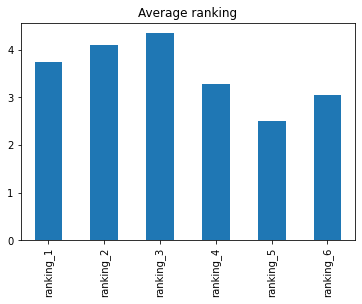

In [15]:
star_wars[ranking_cols].mean().plot.bar(title="Average ranking")

### Views

<AxesSubplot:title={'center':'Number of views'}>

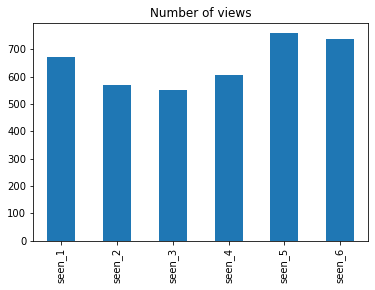

In [16]:
star_wars[seen_cols].sum().plot.bar(title="Number of views")

### Ranking by gender

<AxesSubplot:title={'center':'Average ranking - Males'}>

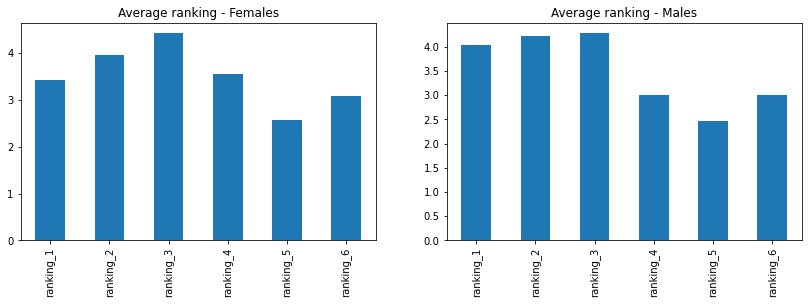

In [17]:
grouped = star_wars.groupby("Gender")

rankings = grouped[ranking_cols].mean()

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
rankings.loc["Female"].plot.bar(title="Average ranking - Females", ax=axs[0])
rankings.loc["Male"].plot.bar(title="Average ranking - Males", ax=axs[1])

### Views by gender

<AxesSubplot:title={'center':'Number of views - Males'}>

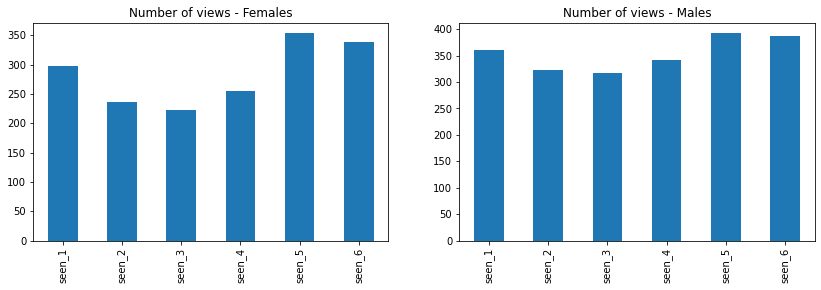

In [18]:
views = grouped[seen_cols].sum()

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
views.loc["Female"].plot.bar(title="Number of views - Females", ax=axs[0])
views.loc["Male"].plot.bar(title="Number of views - Males", ax=axs[1])